In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [7]:
print("\nТипы данных столбцов:")
print(df.dtypes)
print("\nИнформация о DataFrame:")
df.info()


Типы данных столбцов:
Дата            object
Склад            int64
Контрагент      object
Номенклатура    object
Количество       int64
dtype: object

Информация о DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301355 entries, 0 to 301354
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Дата          301355 non-null  object
 1   Склад         301355 non-null  int64 
 2   Контрагент    301355 non-null  object
 3   Номенклатура  301355 non-null  object
 4   Количество    301355 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.5+ MB


Сразу переведем столбец "Дата" в правильный формат

In [8]:
df = pd.read_csv('data.csv', parse_dates=['Дата'])
print(df.head())
print("\nТипы данных столбцов:")
print(df.dtypes)

        Дата  Склад Контрагент Номенклатура  Количество
0 2018-01-04      1  address_0    product_0           4
1 2018-01-04      1  address_0    product_1           4
2 2018-01-04      1  address_0    product_2           5
3 2018-01-04      1  address_0    product_3          10
4 2018-01-04      1  address_0    product_4           2

Типы данных столбцов:
Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сгруппируйте данные по дате, посчитайте количество продаж

In [9]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
print(grouped_df)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [10]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

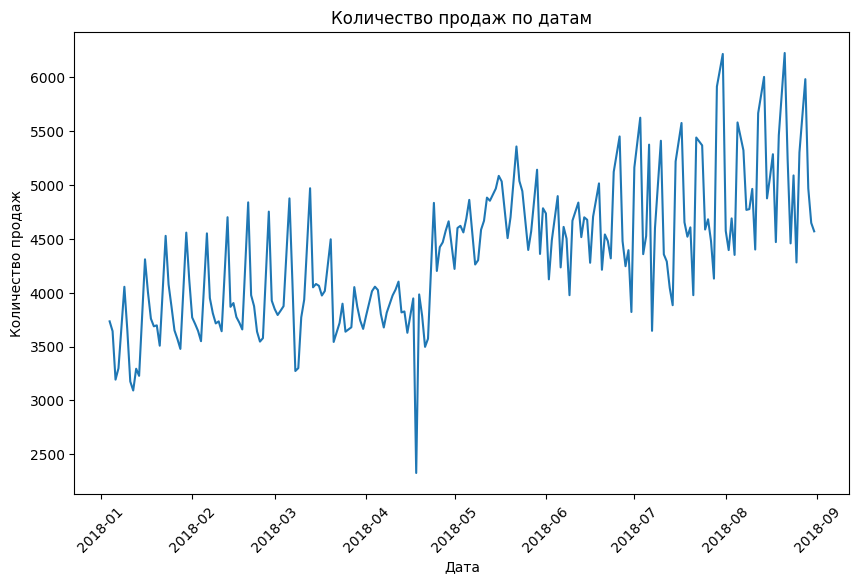

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'])
plt.title('Количество продаж по датам')
plt.xlabel('Дата')
plt.ylabel('Количество продаж')
plt.xticks(rotation=45)
plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:
График показывает явный рост продаж со временем.
Видна некоторая сезонность или цикличность: регулярные колебания вверх и вниз вокруг основной растущей линии тренда.
В мае 2018 года наблюдается резкий спад, после которого продажи возвращаются к прежнему уровню. 
Этот провал выделяется на фоне общего тренда и может быть объяснён специфическим событием или фактором.
Наблюдается высокая частота колебаний (примерно раз в несколько дней), что может указывать на недельную или другой короткий временной цикл спроса.

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [12]:
# Рассчитаем IQR для столбца Количество
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

# Определяем границы выбросов
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Находим выбросы
outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

# Вывод строки с максимальным выбросом
max_outlier = outliers.loc[outliers['Количество'].idxmax()]
print(max_outlier)

Дата            2018-06-28 00:00:00
Склад                             1
Контрагент              address_208
Номенклатура              product_0
Количество                      200
Name: 218822, dtype: object


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [13]:
# Отфильтруем данные за июнь, июль, август
summer_months = df[df['Дата'].dt.month.isin([6, 7, 8])]

# Оставим только среду (weekday == 2)
wednesday_sales = summer_months[summer_months['Дата'].dt.weekday == 2]

# Отфильтруем данные для 3-го склада
warehouse_3_sales = wednesday_sales[wednesday_sales['Склад'] == 3]

# Сгруппируем по номенклатуре и посчитаем общее количество продаж
top_product = (
    warehouse_3_sales.groupby('Номенклатура')['Количество']
    .sum()
    .reset_index()
    .sort_values('Количество', ascending=False)
    .head(1)  # Найти только товар с максимальными продажами
)

print("Топовый товар по продажам за среду у 3-го склада:")
print(top_product)

Топовый товар по продажам за среду у 3-го склада:
  Номенклатура  Количество
1    product_1        2267


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

In [14]:
import xlrd

# Открываем .xls файл с xlrd
xls = xlrd.open_workbook("C:/Users/ilias/Downloads/35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls")
sheet_names = xls.sheet_names()  # Получаем список листов
print(sheet_names)


['Архив Погоды rp5']


In [ ]:
# Укажите путь к файлу
file_path = "C:/Users/ilias/Downloads/35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls"

# Загружаем данные с листа "Архив Погоды rp5"
sheet_name = "Архив Погоды rp5"
df = pd.read_excel(file_path, sheet_name=sheet_name, engine="xlrd")

# Просмотр первых строк
print(df.head(10))


  # Метеостанция Астана, Казахстан, WMO_ID=35188, выборка с 04.01.2018 по 31.08.2018, все дни  \
0                                 # Кодировка: UTF-8                                            
1  # Информация предоставлена сайтом "Расписание ...                                            
2  # Пожалуйста, при использовании данных, любезн...                                            
3  # Обозначения метеопараметров см. по адресу ht...                                            
4                                                  #                                            
5                             Местное время в Астане                                            
6                                   31.08.2018 23:00                                            
7                                   31.08.2018 20:00                                            
8                                   31.08.2018 17:00                                            
9                             

In [27]:
import pandas as pd

file_path = "C:/Users/ilias/Downloads/35188.04.01.2018.31.08.2018.1.0.0.ru.utf8.00000000.xls"

# Загружаем данные, пропуская первые 6 строк
df = pd.read_excel(file_path, sheet_name="Архив Погоды rp5", skiprows=6, usecols=[0, 1], names=["Дата", "T"], engine="xlrd")

# Преобразуем дату в нужный формат
df["Дата"] = pd.to_datetime(df["Дата"], errors="coerce").dt.date

# Группируем по дате, усредняя температуру за день
df = df.groupby("Дата", as_index=False)["T"].mean()

# Выводим результат
print(df.head())


         Дата        T
0  2018-01-04 -14.0750
1  2018-01-05 -16.8625
2  2018-01-06 -13.3000
3  2018-01-07 -12.7500
4  2018-01-08 -15.4125


C:\Users\ilias\AppData\Local\Temp\ipykernel_10524\3648873573.py:9: UserWarning: Parsing dates in %d.%m.%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["Дата"] = pd.to_datetime(df["Дата"], errors="coerce").dt.date


In [28]:
# Приводим дату в обоих датафреймах к единому формату
df["Дата"] = pd.to_datetime(df["Дата"], format="%d.%m.%Y", errors="coerce")
grouped_df["Дата"] = pd.to_datetime(grouped_df["Дата"], errors="coerce")

# Проверяем, что всё в порядке
print(df.dtypes)
print(grouped_df.dtypes)

# Объединяем таблицы
merged_df = grouped_df.merge(df, on="Дата", how="left")

# Выводим первые строки
print(merged_df.head())


Дата    datetime64[ns]
T              float64
dtype: object
Дата          datetime64[ns]
Количество             int64
dtype: object
        Дата  Количество        T
0 2018-01-04        3734 -14.0750
1 2018-01-05        3643 -16.8625
2 2018-01-06        3193 -13.3000
3 2018-01-07        3298 -12.7500
4 2018-01-09        4055  -6.2500


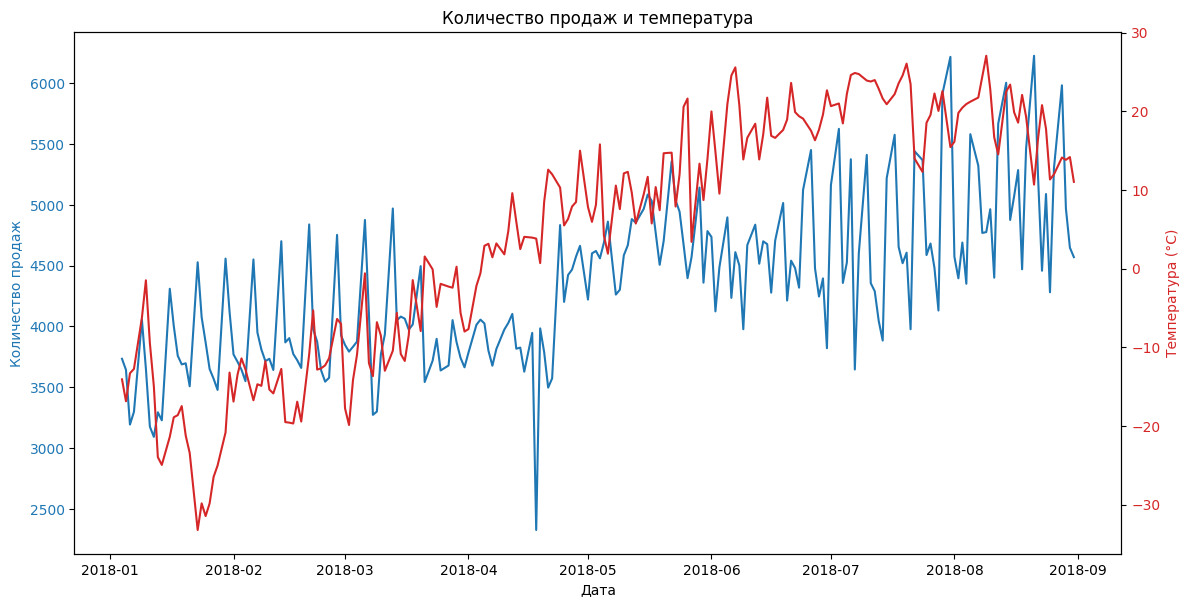

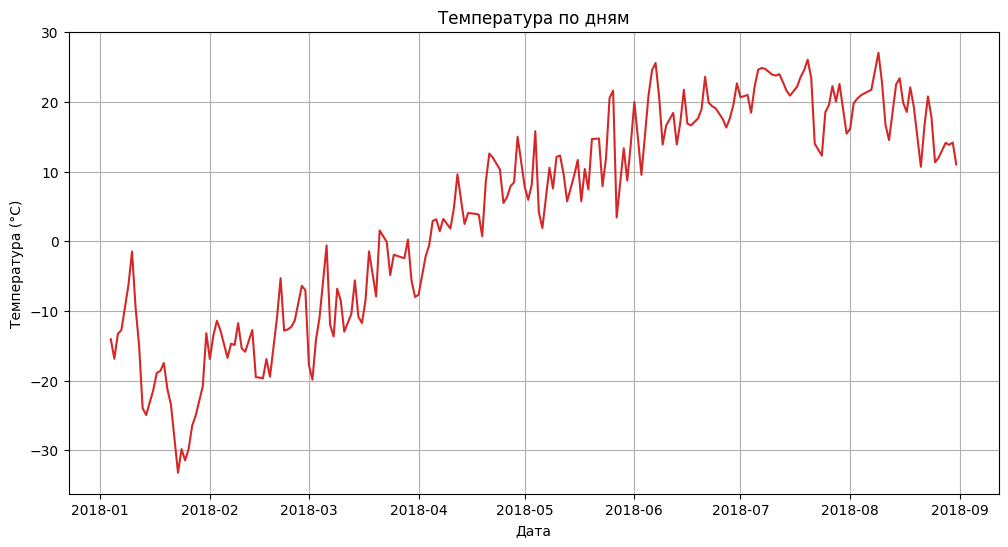

In [30]:
# График "Количество продаж" и "Температура"
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.set_xlabel("Дата")
ax1.set_ylabel("Количество продаж", color="tab:blue")
ax1.plot(merged_df["Дата"], merged_df["Количество"], color="tab:blue", label="Количество продаж")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()  
ax2.set_ylabel("Температура (°C)", color="tab:red")
ax2.plot(merged_df["Дата"], merged_df["T"], color="tab:red", label="Температура")
ax2.tick_params(axis="y", labelcolor="tab:red")

fig.tight_layout()  
plt.title("Количество продаж и температура")
plt.show()

# Отдельный график температуры
plt.figure(figsize=(12, 6))
plt.plot(merged_df["Дата"], merged_df["T"], color="tab:red")
plt.xlabel("Дата")
plt.ylabel("Температура (°C)")
plt.title("Температура по дням")
plt.grid(True)
plt.show()
